In [78]:
from PIL import Image, ImageFont, ImageDraw
im = Image.open('./online_set/b.gif') 
#im = Image.open('./47-46-1_99-43-0_149-44-1_214-45-1_265-47-0_313-46-0_367-41-0.png')
%matplotlib inline

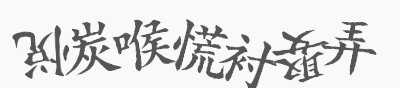

In [79]:
im

In [80]:
from zheye import util

In [81]:
im = util.centerExtend(im, radius=20)

In [82]:
vec = util.img2vec(im).copy()

In [83]:
for i in range(vec.shape[0]):
    for j in range(vec.shape[1]):
        if vec[i][j] >= 249:
            vec[i][j] = 255

In [84]:
im = Image.fromarray(vec, 'L')

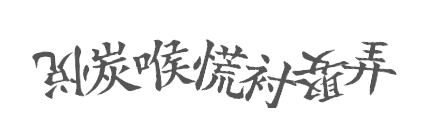

In [85]:
im

In [86]:
Y = []
for i in range(vec.shape[0]):
    for j in range(vec.shape[1]):
        if vec[i][j] <= 200:
            Y.append([i, j])

In [87]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=7, n_init=10)

In [88]:
k_means.fit(Y)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [89]:
import numpy as np
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)

In [90]:
k_means_cluster_centers

array([[  63.34171908,   62.35473341],
       [  64.71819425,  111.53674121],
       [  68.02854424,  164.73480084],
       [  68.13205538,  217.59847764],
       [  71.30576714,  265.22183908],
       [  76.66333666,  318.6963037 ],
       [  81.9908046 ,  369.48016416]])

In [91]:
x

39

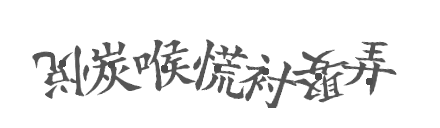

In [92]:
util.PaintPoint(im, k_means_cluster_centers)

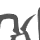

In [93]:
util.crop(im,  58.37139272,   57.04139434, radius=20)

In [73]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras

In [74]:
model = keras.models.load_model('chunhu.keras')

In [75]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

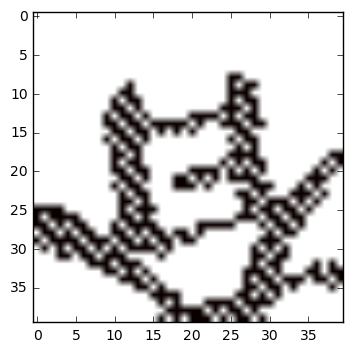

0.611488


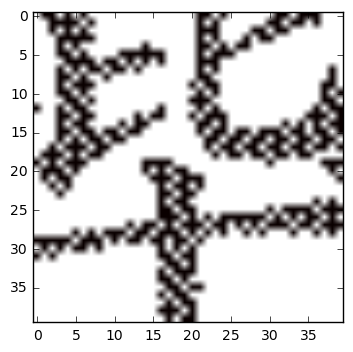

0.601372


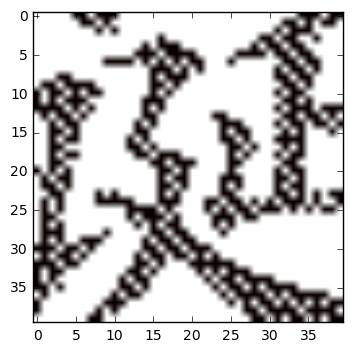

0.922447


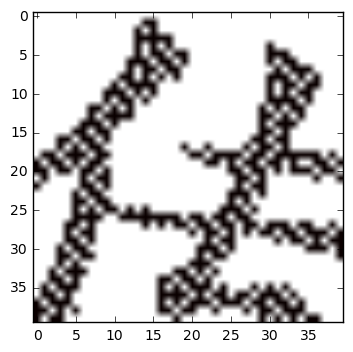

0.841087


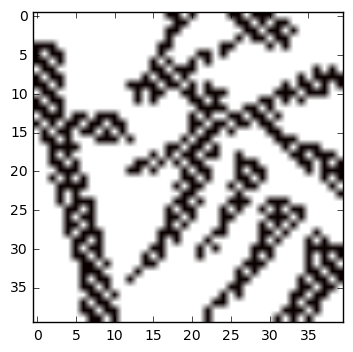

0.873821


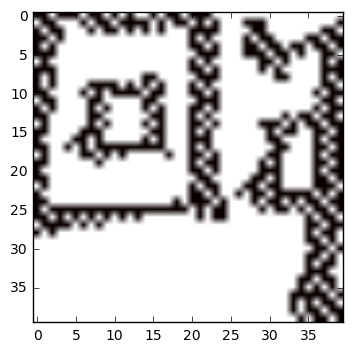

0.00343094


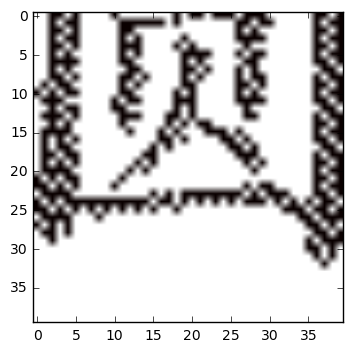

0.0170589


In [76]:
plt.ion()
for i in range(7):
    x = k_means_cluster_centers[i][0]
    y = k_means_cluster_centers[i][1]
    
    cr = util.crop(im, x, y, radius=25)
    X = np.asarray(cr.convert('1'), dtype='float')

    xx = X.astype('uint8')*255
    mm = Image.fromarray(xx)
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    #X = (255 - X )/200;
    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    m_y = model.predict(x1)
    print(m_y[0][0])

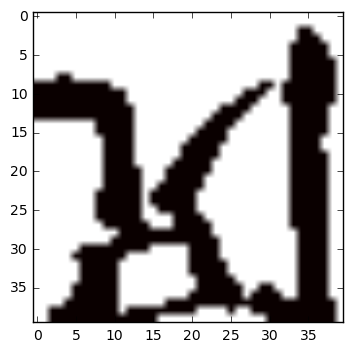

[ 0.08010855  0.91989148]


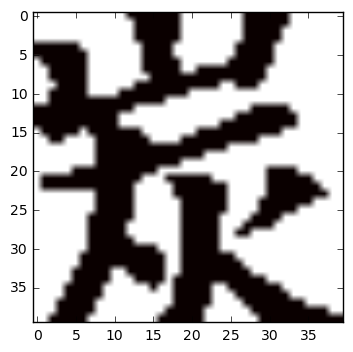

[ 0.99438912  0.00561092]


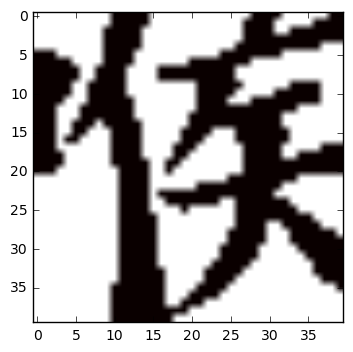

[ 0.9500047   0.04999528]


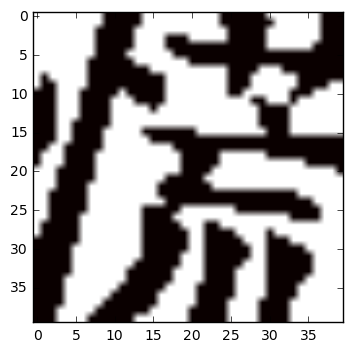

[  9.99752343e-01   2.47622811e-04]


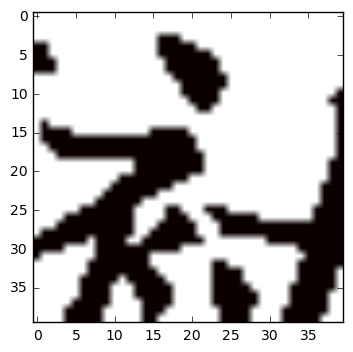

[ 0.99820554  0.00179442]


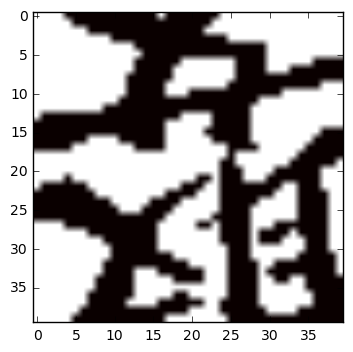

[  4.47702320e-07   9.99999523e-01]


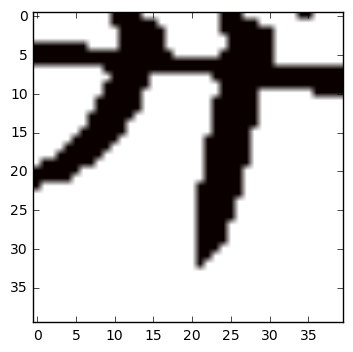

[ 0.585253  0.414747]


In [94]:
plt.ion()
for i in range(7):
    x = k_means_cluster_centers[i][0]
    y = k_means_cluster_centers[i][1]
    
    cr = util.crop(im, x, y, radius=20)
    cr = cr.resize((40, 40), Image.ANTIALIAS)
    
    #X = np.asarray(cr.convert('1'), dtype='float')
    X = np.asarray(cr.convert('L'), dtype='float')
    
    #X = X.ravel()
    for (x,y), value in np.ndenumerate(X):
        if value > 200:
            X[x][y] = 1.0
        else:
            X[x][y] = 0.0
    
    
    xx = X.astype('uint8')*255
    mm = Image.fromarray(xx)
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    #X = (255 - X )/200;
    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    m_y = model.predict(x1)
    print(m_y[0])

In [ ]:
r = util.RandomGenerateOneFile()

In [ ]:
train_X = np.load('./testing_X.npy')
train_Y = np.load('./testing_Y.npy')

In [ ]:
train_X.shape

In [ ]:
from PIL import Image, ImageFont, ImageDraw
im = Image.open('./online_set/d.gif') 
#im = Image.open('./47-46-1_99-43-0_149-44-1_214-45-1_265-47-0_313-46-0_367-41-0.png')
%matplotlib inline